In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import catboost as cb
import optuna
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score,classification_report,mean_absolute_error
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, train_test_split,PredefinedSplit
from sklearn.tree import DecisionTreeRegressor

In [2]:
df = pd.read_csv("Admission_Predict_Ver1.1.csv")

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.shape

(500, 9)

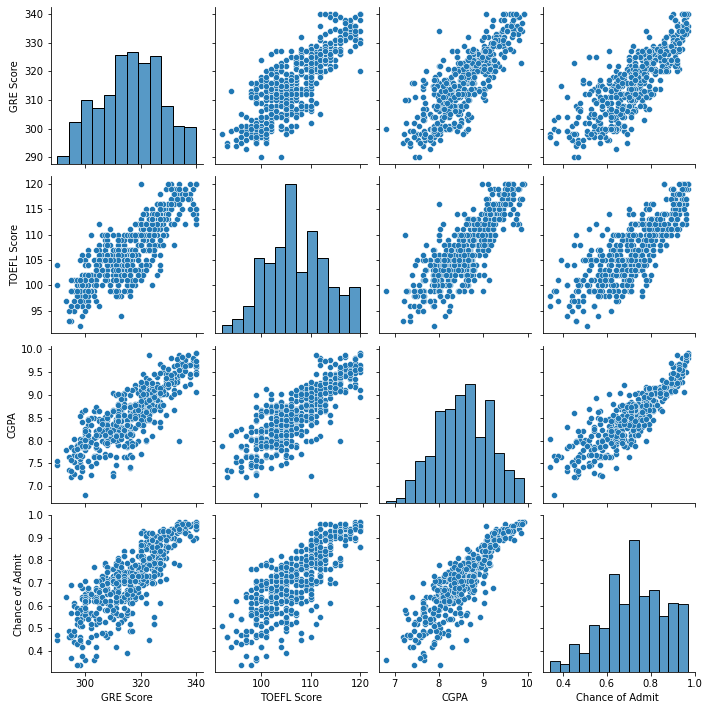

In [5]:
sns.pairplot(df.drop(["Serial No.","University Rating","SOP","LOR ","Research"],axis=1))

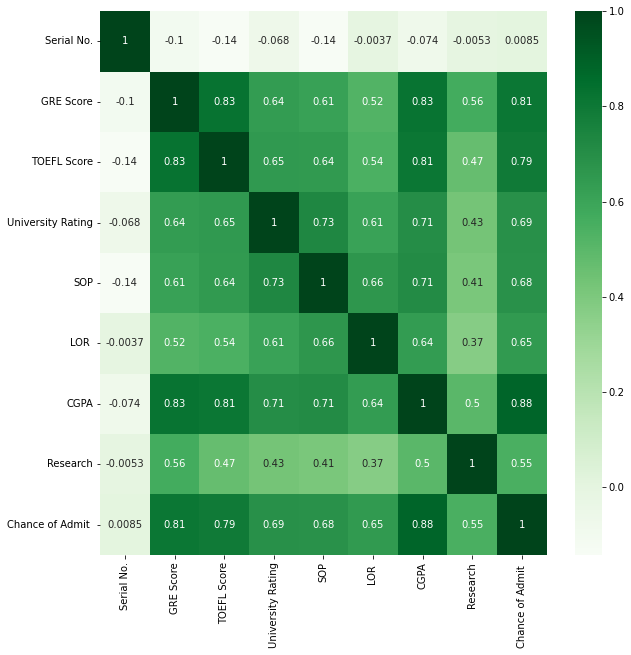

In [6]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(df.corr(),cmap="Greens",annot=True,ax=ax)
plt.show()

In [7]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [8]:
y = df["Chance of Admit "]
X = df.drop(["Serial No.","Chance of Admit "],axis=1)

In [9]:
import statsmodels.api as sm

In [10]:
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=967)

In [11]:
cols=X_train.columns

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
X_train = pd.DataFrame(X_train,columns=cols)
X_test = pd.DataFrame(X_test,columns=cols)
y_train = list(y_train)
y_test = list(y_test)

In [14]:
X_train.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,-1.468433,-1.008898,-0.107337,0.113386,-1.051343,-1.139188,-1.122447
1,-1.380092,-1.333695,-0.983555,-0.385013,-1.580987,-0.586520,-1.122447
2,2.065170,0.939879,0.768881,1.608582,1.596876,1.884235,0.890911
3,0.740069,0.777481,0.768881,0.611784,0.537589,0.681367,0.890911
4,-1.556773,-0.196908,-0.983555,0.611784,0.537589,-0.293930,-1.122447


In [15]:
X_train_const = sm.add_constant(X_train)

D:\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [16]:
X_train_const.head()

,const,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1.0,-1.468433,-1.008898,-0.107337,0.113386,-1.051343,-1.139188,-1.122447
1,1.0,-1.380092,-1.333695,-0.983555,-0.385013,-1.580987,-0.586520,-1.122447
2,1.0,2.065170,0.939879,0.768881,1.608582,1.596876,1.884235,0.890911
3,1.0,0.740069,0.777481,0.768881,0.611784,0.537589,0.681367,0.890911
4,1.0,-1.556773,-0.196908,-0.983555,0.611784,0.537589,-0.293930,-1.122447


In [17]:
model = sm.OLS(y_train,X_train_const).fit()

In [18]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     238.0
Date:                Thu, 25 Aug 2022   Prob (F-statistic):          6.95e-137
Time:                        20:52:15   Log-Likelihood:                 538.35
No. Observations:                 400   AIC:                            -1061.
Df Residuals:                     392   BIC:                            -1029.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7209      0.003    226.584      0.000       0.715       0.727
GRE Score             0.0184      0.007      2.681      0.008       0.005       0.032
TOEFL Score           0.0189      0.006      2.943      0.003       0.006       0.032
University Rating     0.0073      0.005      1.387      0.166      -0.003       0.018
SOP                   0.0019      0.005      0.340      0.734      -0.009       0.013
LOR                   0.0169      0.005      3.729      0.000       0.008       0.026
CGPA                  0.0717      0.007     10.388      0.000       0.058       0.085
Research              0.0128      0.004      3.238      0.001       0.005       0.021
==============================================================================
Omnibus:                       84.873   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              173.689
Skew:                          -1.124   Prob(JB):                     1.92e-38
Kurtosis:                       5.317   Cond. No.                         5.78
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
X_train.drop("SOP",axis=1,inplace=True)

In [20]:
X_train_const = sm.add_constant(X_train)

D:\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [21]:
model = sm.OLS(y_train,X_train_const).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     278.3
Date:                Thu, 25 Aug 2022   Prob (F-statistic):          4.23e-138
Time:                        20:52:15   Log-Likelihood:                 538.29
No. Observations:                 400   AIC:                            -1063.
Df Residuals:                     393   BIC:                            -1035.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7209      0.003    226.839      0.000       0.715       0.727
GRE Score             0.0182      0.007      2.669      0.008       0.005       0.032
TOEFL Score           0.0191      0.006      2.989      0.003       0.007       0.032
University Rating     0.0079      0.005      1.627      0.105      -0.002       0.018
LOR                   0.0174      0.004      4.029      0.000       0.009       0.026
CGPA                  0.0722      0.007     10.709      0.000       0.059       0.086
Research              0.0128      0.004      3.265      0.001       0.005       0.021
==============================================================================
Omnibus:                       83.937   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              170.751
Skew:                          -1.115   Prob(JB):                     8.36e-38
Kurtosis:                       5.296   Cond. No.                         5.30
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
X_train.drop("University Rating",axis=1,inplace=True)
X_train_const = sm.add_constant(X_train)
model = sm.OLS(y_train,X_train_const).fit()
model.summary()

D:\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     332.0
Date:                Thu, 25 Aug 2022   Prob (F-statistic):          8.23e-139
Time:                        20:52:15   Log-Likelihood:                 536.95
No. Observations:                 400   AIC:                            -1062.
Df Residuals:                     394   BIC:                            -1038.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.7209      0.003    226.366      0.000       0.715       0.727
GRE Score       0.0188      0.007      2.748      0.006       0.005       0.032
TOEFL Score     0.0206      0.006      3.243      0.001       0.008       0.033
LOR             0.0191      0.004      4.558      0.000       0.011       0.027
CGPA            0.0750      0.007     11.463      0.000       0.062       0.088
Research        0.0133      0.004      3.379      0.001       0.006       0.021
==============================================================================
Omnibus:                       81.715   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.057
Skew:                          -1.093   Prob(JB):                     2.37e-36
Kurtosis:                       5.251   Cond. No.                         4.85
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
def calc_vif(X):
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

In [24]:
calc_vif(X_train)

,variables,VIF
0,GRE Score,4.604880
1,TOEFL Score,3.966386
2,LOR,1.734625
3,CGPA,4.221666
4,Research,1.523922


In [25]:
X.drop(["SOP","University Rating"],axis=1,inplace=True)

In [26]:
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=967)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
model = LinearRegression()
model.fit(X_train, y_train)
preds=model.predict(X_test)
df2=pd.DataFrame()
df2['actual']=y_test
df2['preds']=preds
print(model.score(X_test,y_test))
print(np.sqrt(mean_squared_error(df2['actual'],df2['preds'])))
print(mean_squared_error(df2['actual'],df2['preds']))
print(mean_absolute_error(df2['actual'],df2['preds']))

0.883324198809718
0.0433049610519314
0.0018753196517092958
0.03525614945516989


In [27]:
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=967)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
model = DecisionTreeRegressor(max_depth=5)
model.fit(X_train, y_train)
preds=model.predict(X_test)
df2=pd.DataFrame()
df2['actual']=y_test
df2['preds']=preds
print(model.score(X_test,y_test))
print(np.sqrt(mean_squared_error(df2['actual'],df2['preds'])))
print(mean_squared_error(df2['actual'],df2['preds']))
print(mean_absolute_error(df2['actual'],df2['preds']))

0.7899046703030819
0.05811061284859155
0.0033768433256388935
0.04289432027236359


In [28]:
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=967)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
model = RandomForestRegressor(n_estimators=500,max_depth=5)
model.fit(X_train,y_train)
df2=pd.DataFrame()
df2['actual']=y_test
df2['preds']=preds
print(model.score(X_test,y_test))
print(np.sqrt(mean_squared_error(df2['actual'],df2['preds'])))
print(mean_squared_error(df2['actual'],df2['preds']))
print(mean_absolute_error(df2['actual'],df2['preds']))

0.8622681852734735
0.05811061284859155
0.0033768433256388935
0.04289432027236359


In [29]:
model.feature_importances_

array([0.08536301, 0.02965744, 0.01602862, 0.8606481 , 0.00830282])

In [30]:
# arr=[]
# for i in range(1,1001):
#     X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=i)
#     sc = StandardScaler()
#     X_train = sc.fit_transform(X_train)
#     X_test = sc.transform(X_test)
#     model = RandomForestRegressor()
#     model.fit(X_train,y_train)
#     preds=model.predict(X_test)
#     df2=pd.DataFrame()
#     df2['actual']=y_test
#     df2['preds']=preds
#     df2=df2.apply(sigmoid)
#     score=np.sqrt(mean_squared_error(df2['actual'],df2['preds']))
#     arr.append((i,score))

In [31]:
# arr.sort(key=lambda x:x[1])

In [32]:
# arr

In [33]:
# arr2=[]
# for i in range(1,1001):
#     X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=i)
#     sc = StandardScaler()
#     X_train = sc.fit_transform(X_train)
#     X_test = sc.transform(X_test)
#     model = XGBRegressor()
#     model.fit(X_train,y_train)
#     preds=model.predict(X_test)
#     df2=pd.DataFrame()
#     df2['actual']=y_test
#     df2['preds']=preds
#     df2=df2.apply(sigmoid)
#     score=np.sqrt(mean_squared_error(df2['actual'],df2['preds']))
#     arr2.append((i,score))

In [34]:
# arr2.sort(key=lambda x:x[1])
# arr2

In [35]:
# arr2=[]
# for i in range(1,1001):
#     X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=i)
#     sc = StandardScaler()
#     X_train = sc.fit_transform(X_train)
#     X_test = sc.transform(X_test)
#     model = cb.CatBoostRegressor(loss_function="RMSE")
#     model.fit(X_train,y_train)
#     preds=model.predict(X_test)
#     df2=pd.DataFrame()
#     df2['actual']=y_test
#     df2['preds']=preds
#     df2=df2.apply(sigmoid)
#     score=np.sqrt(mean_squared_error(df2['actual'],df2['preds']))
#     arr2.append((i,score))

In [36]:
# arr2.sort(key=lambda x:x[1])
# arr2

In [37]:
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=967)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
model = XGBRegressor(n_estimators=100, max_depth=2)
model.fit(X_train,y_train)
preds = model.predict(X_test)
df2=pd.DataFrame()
df2['actual']=y_test
df2['preds']=preds
print(model.score(X_test,y_test))
print(np.sqrt(mean_squared_error(df2['actual'],df2['preds'])))
print(mean_squared_error(df2['actual'],df2['preds']))
print(mean_absolute_error(df2['actual'],df2['preds']))

[20:52:16] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.8697851297987234
0.04574857253955364
0.0020929318894068014
0.03367398900985718


In [38]:
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=967)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
model = cb.CatBoostRegressor(loss_function="RMSE",max_depth=2,n_estimators=1000)
model.fit(X_train,y_train)
preds = model.predict(X_test)
df2=pd.DataFrame()
df2['actual']=y_test
df2['preds']=preds
print(model.score(X_test,y_test))
print(np.sqrt(mean_squared_error(df2['actual'],df2['preds'])))
print(mean_squared_error(df2['actual'],df2['preds']))
print(mean_absolute_error(df2['actual'],df2['preds']))

Learning rate set to 0.035425
0:	learn: 0.1419441	total: 130ms	remaining: 2m 9s
1:	learn: 0.1391684	total: 130ms	remaining: 1m 4s
2:	learn: 0.1362816	total: 131ms	remaining: 43.4s
3:	learn: 0.1334431	total: 131ms	remaining: 32.6s
4:	learn: 0.1311794	total: 131ms	remaining: 26.2s
5:	learn: 0.1287420	total: 132ms	remaining: 21.8s
6:	learn: 0.1262666	total: 132ms	remaining: 18.8s
7:	learn: 0.1242804	total: 133ms	remaining: 16.4s
8:	learn: 0.1222085	total: 133ms	remaining: 14.6s
9:	learn: 0.1201099	total: 133ms	remaining: 13.2s
10:	learn: 0.1181773	total: 134ms	remaining: 12s
11:	learn: 0.1160014	total: 134ms	remaining: 11.1s
12:	learn: 0.1143374	total: 135ms	remaining: 10.2s
13:	learn: 0.1120674	total: 135ms	remaining: 9.51s
14:	learn: 0.1101825	total: 135ms	remaining: 8.89s
15:	learn: 0.1086377	total: 136ms	remaining: 8.35s
16:	learn: 0.1068494	total: 136ms	remaining: 7.87s
17:	learn: 0.1050286	total: 136ms	remaining: 7.45s
18:	learn: 0.1033938	total: 137ms	remaining: 7.06s
19:	learn: 0.

600:	learn: 0.0562569	total: 304ms	remaining: 202ms
601:	learn: 0.0562538	total: 304ms	remaining: 201ms
602:	learn: 0.0562493	total: 304ms	remaining: 200ms
603:	learn: 0.0562375	total: 304ms	remaining: 200ms
604:	learn: 0.0562330	total: 305ms	remaining: 199ms
605:	learn: 0.0562290	total: 305ms	remaining: 198ms
606:	learn: 0.0562064	total: 305ms	remaining: 198ms
607:	learn: 0.0561991	total: 306ms	remaining: 197ms
608:	learn: 0.0561680	total: 306ms	remaining: 196ms
609:	learn: 0.0561630	total: 306ms	remaining: 196ms
610:	learn: 0.0561588	total: 307ms	remaining: 195ms
611:	learn: 0.0561513	total: 307ms	remaining: 195ms
612:	learn: 0.0561250	total: 307ms	remaining: 194ms
613:	learn: 0.0561142	total: 307ms	remaining: 193ms
614:	learn: 0.0561033	total: 308ms	remaining: 193ms
615:	learn: 0.0560914	total: 308ms	remaining: 192ms
616:	learn: 0.0560805	total: 308ms	remaining: 191ms
617:	learn: 0.0560766	total: 309ms	remaining: 191ms
618:	learn: 0.0560673	total: 309ms	remaining: 190ms
619:	learn: 

0.8619561660314555
0.04710378030934841
0.002218766119431359
0.034202864557102315


In [39]:
# X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=967)
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

In [40]:
# cbr=cb.CatBoostRegressor()
# grid = {'max_depth': [1,2,3,4,5],'n_estimators':[100, 200, 300, 500, 750, 1000]}
# gscv = GridSearchCV (estimator = cbr, param_grid = grid, scoring ='neg_root_mean_squared_error', cv = 5)
# gscv.fit(X_train,y_train)

In [41]:
# #returns the estimator with the best performance
# print(gscv.best_estimator_)

# #returns the best score
# print(gscv.best_score_)

# #returns the best parameters
# print(gscv.best_params_)

In [42]:
# df3=pd.DataFrame()
# df3['actual']=df2['actual'].apply(lambda x: 1 if x>=0.6 else 0)
# df3['preds']=df2['preds'].apply(lambda x: 1 if x>=0.6 else 0)

In [43]:
# print(classification_report(df3['actual'],df3['preds']))

In [44]:
# df2

In [45]:
# df2.describe()

In [46]:
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=967)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
model = LinearRegression()
model.fit(X_train,y_train)
pred_test = model.predict(X_test)
df3=pd.DataFrame()
df3['actual']=y_test
df3['preds']=pred_test
print(model.score(X_test,y_test))
print(np.sqrt(mean_squared_error(df3['actual'],df3['preds'])))
print(mean_squared_error(df3['actual'],df3['preds']))
print(mean_absolute_error(df3['actual'],df3['preds']))

0.883324198809718
0.0433049610519314
0.0018753196517092958
0.03525614945516989


In [47]:
X=sc.transform(X)

In [48]:
pred_all=model.predict(X)
df2=pd.DataFrame()
df2['actual']=y
df2['preds']=pred_all
print(model.score(X,y))
print(np.sqrt(mean_squared_error(df2['actual'],df2['preds'])))
print(mean_squared_error(df2['actual'],df2['preds']))
print(mean_absolute_error(df2['actual'],df2['preds']))

0.8203591422008369
0.059761183117856075
0.0035713990076459263
0.04321354402589776


In [49]:
df3.describe()

,actual,preds
count,100.000000,100.000000
mean,0.725300,0.716060
std,0.127418,0.119085
min,0.440000,0.483018
25%,0.640000,0.633313
50%,0.720000,0.716945
75%,0.805000,0.803550
max,0.970000,0.972946


In [50]:
df2.describe()

,actual,preds
count,500.00000,500.000000
mean,0.72174,0.719892
std,0.14114,0.127714
min,0.34000,0.424041
25%,0.63000,0.624723
50%,0.72000,0.711377
75%,0.82000,0.819057
max,0.97000,0.996617
